<a href="https://colab.research.google.com/github/KaziShadmanSakib/Artificial-Intelligence/blob/main/IEEE_Membership_Drive2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Divided according to the Payers, distribution of IEEE new and/or old members 2023 University of Dhaka.**

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns

In [65]:
# name of the files in the folder
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IEEEMembershipDrive2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# data fetched
data = pd.read_csv("/content/drive/MyDrive/IEEEMembershipDrive2023/MembershipDrive2023Responses.csv")


# checking the train_data columns
data.head()

/content/drive/MyDrive/IEEEMembershipDrive2023/MembershipDrive2023Responses.csv


,Timestamp,Email Address,Name,Currently in,Department,Institution Name,Select the societies of IEEE SB DU you want to join,Are you an IEEE member?,Your IEEE Membership ID (Write N/A for new members),Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Why do you want to be a member of IEEE?,Email ID (Mention the Email ID you used to sign up on IEEE),Phone Number,Bkash/Nagad/Rocket number from which you paid-,Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/14/2023 10:51:34,NaN,Kaisari Ferdous,3rd Year,EEE,Dhaka University,"WIE (Women in Engineering), SIGHT (Humanitaria...",No,NaN,Nusaiba Binte Mamun,ABE0K13PAQ,For publishing research paper And reading dif...,cdtferdous478@gmail.com,1.318241e+09,NaN,NaN
2,2/16/2023 11:56:28,NaN,M. Ashikuzzaman Kowshik,4th Year,EEE,University of Dhaka,"WIE (Women in Engineering), SIGHT (Humanitaria...",Yes,96593755,Self Payment,NaN,NaN,ashikuzzaman.kowshik@ieee.org,1.878696e+09,01878695598,NaN
3,2/16/2023 12:31:00,NaN,Nishat Tasnim,Graduate (Session 17-18 and beyond),Department of Electrical and Electronics Engin...,University of Dhaka,"WIE (Women in Engineering), SIGHT (Humanitaria...",Yes,96433798,Arpan Saha,ABA2FM57YO,NaN,nishatt336@gmail.com,8.801743e+12,Bkash,NaN
4,2/16/2023 14:24:59,NaN,Shafiq-us Saleheen,4th Year,Software Engineering (IIT),Institute of Information Technology,"SIGHT (Humanitarian Technology), CS (Computer ...",Yes,97078847,Nusaiba Binte Mamun,ABG9MIBMGP,To do research work,bsse1125@iit.du.ac.bd,1.955001e+09,01955001206,NaN


In [66]:
# deleted redundant column
del data["Timestamp"]
del data["Email Address"]
del data["Currently in"]
del data["Department"]
del data["Institution Name"]
del data["Your IEEE Membership ID (Write N/A for new members)"]
del data["Why do you want to be a member of IEEE?"]
del data["Score"]
del data["Are you an IEEE member?"]
del data["Phone Number"]
del data["Select the societies of IEEE SB DU you want to join"]

# delete a single row by index value 0
data = data.drop(labels=0, axis=0)

data.head()

,Name,Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Email ID (Mention the Email ID you used to sign up on IEEE),Bkash/Nagad/Rocket number from which you paid-
1,Kaisari Ferdous,Nusaiba Binte Mamun,ABE0K13PAQ,cdtferdous478@gmail.com,NaN
2,M. Ashikuzzaman Kowshik,Self Payment,NaN,ashikuzzaman.kowshik@ieee.org,01878695598
3,Nishat Tasnim,Arpan Saha,ABA2FM57YO,nishatt336@gmail.com,Bkash
4,Shafiq-us Saleheen,Nusaiba Binte Mamun,ABG9MIBMGP,bsse1125@iit.du.ac.bd,01955001206
5,Ashin Roy,Arpan Saha,ABG4MKAHXW,ashin-2021211452@eee.du.ac.bd,01882736015


<AxesSubplot:xlabel='Whom did you send the payment?', ylabel='count'>

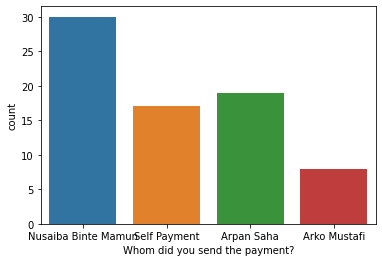

In [67]:
# visualization of column Whom did you send the payment? to check survived vs not survived ratio
sns.countplot(x = "Whom did you send the payment?", data = data)

In [68]:
# create an empty DataFrame to store the rows that satisfy the condition
Nusaiba = pd.DataFrame(columns=data.columns)

str = 'Nusaiba Binte Mamun'

# iterate through all rows while checking a specific type in a specified column
for index, row in data.iterrows():
  if row['Whom did you send the payment?'] == str:
    Nusaiba = Nusaiba.append(row, ignore_index=True)

Nusaiba.head()

,Name,Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Email ID (Mention the Email ID you used to sign up on IEEE),Bkash/Nagad/Rocket number from which you paid-
0,Kaisari Ferdous,Nusaiba Binte Mamun,ABE0K13PAQ,cdtferdous478@gmail.com,NaN
1,Shafiq-us Saleheen,Nusaiba Binte Mamun,ABG9MIBMGP,bsse1125@iit.du.ac.bd,01955001206
2,Mehejabin Akter Niti,Nusaiba Binte Mamun,ABH9N4ZEWL,mehejabinakter-2021211443@eee.du.ac.bd,01780574028
3,Zarifa Tanzim,Nusaiba Binte Mamun,ABH1N5089V,zarifa-2021711439@eee.du.ac.bd,01517310297
4,Tamima Tasnim,Nusaiba Binte Mamun,ABH4NE1V9Q,tasnimtamima11@gmail.com,Bkash-01798276901


In [69]:
# create an empty DataFrame to store the rows that satisfy the condition
Self_Payment = pd.DataFrame(columns=data.columns)

str = 'Self Payment'
# iterate through all rows while checking a specific type in a specified column
for index, row in data.iterrows():
  if row['Whom did you send the payment?'] == str:
    Self_Payment = Self_Payment.append(row, ignore_index=True)
  if row['Name'] == 'Kazi Shadman Sakib': print("Found") 

Self_Payment.head()

Found


,Name,Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Email ID (Mention the Email ID you used to sign up on IEEE),Bkash/Nagad/Rocket number from which you paid-
0,M. Ashikuzzaman Kowshik,Self Payment,NaN,ashikuzzaman.kowshik@ieee.org,01878695598
1,Arpan Saha,Self Payment,NaN,arpansaha0009@gmail.com,NaN
2,Syeda Maliha Reza,Self Payment,NaN,syedareza@ieee.org,01757502522
3,Jahnabee Naha Joya,Self Payment,ABI9OYYU4N,ud170558@gmail.com,01571437861
4,PINOK CHOWDHURY MANIK,Self Payment,NaN,pinokchy2019@gmail.com,NaN


In [70]:
# create an empty DataFrame to store the rows that satisfy the condition
Arpan = pd.DataFrame(columns=data.columns)

str = 'Arpan Saha'
# iterate through all rows while checking a specific type in a specified column
for index, row in data.iterrows():
  if row['Whom did you send the payment?'] == str:
    Arpan = Arpan.append(row, ignore_index=True)
  if row['Name'] == 'Partho Sarker': print("Found")
Arpan.head()

Found


,Name,Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Email ID (Mention the Email ID you used to sign up on IEEE),Bkash/Nagad/Rocket number from which you paid-
0,Nishat Tasnim,Arpan Saha,ABA2FM57YO,nishatt336@gmail.com,Bkash
1,Ashin Roy,Arpan Saha,ABG4MKAHXW,ashin-2021211452@eee.du.ac.bd,01882736015
2,Anik Roy,Arpan Saha,ABH9NMHWCN,anikroy8299@gmail.com,01558476204
3,Ashin Roy,Arpan Saha,ABG4MKAHXW,ashin-2021211452@eee.du.ac.bd,01882736015
4,MD. Mazidur Rahman,Arpan Saha,ABI7OOYHRV,rahmanmazidur71@gmail.com,Bkash


In [71]:
# create an empty DataFrame to store the rows that satisfy the condition
Arko = pd.DataFrame(columns=data.columns)

str = 'Arko Mustafi'
# iterate through all rows while checking a specific type in a specified column
for index, row in data.iterrows():
  if row['Whom did you send the payment?'] == str:
    Arko = Arko.append(row, ignore_index=True)

Arko.head()

,Name,Whom did you send the payment?,Transaction ID (Write N/A if you have done Self-Payment),Email ID (Mention the Email ID you used to sign up on IEEE),Bkash/Nagad/Rocket number from which you paid-
0,Asif Rahman Dipto,Arko Mustafi,ABG5N4VZVB,asifrahman.ard@gmail.com,01793029577
1,Niloy Malo,Arko Mustafi,ABH8N57MUG,niloymalo_bd@ieee.com,Bkash
2,Mohammad Mazidul Gani Siam,Arko Mustafi,ABH9N5GDJ3,mazidulgani-2018626195@eee.du.ac.bd,bkash
3,Md Saife Hoq,Arko Mustafi,71PE0WYN,mdsaife-2021311479@eee.du.ac.bd,NAGAD
4,Tahmid Noor Khan,Arko Mustafi,NaN,noort271154358@gmail.com,01886670111


In [72]:
# save DataFrame to a CSV file
Nusaiba.to_csv('Nusaiba.csv', index=False)
# save DataFrame to a CSV file
Self_Payment.to_csv('Self_Payment.csv', index=False)
# save DataFrame to a CSV file
Arpan.to_csv('Arpan.csv', index=False)
# save DataFrame to a CSV file
Arko.to_csv('Arko.csv', index=False)